# FDNY Monthly Times
## By: Carolina Zea

### This script contains the following:


## • Correlation Analysis
## • Regression Analysis 
## • Elbow Technique Analysis 
## • K-Means Clustering Analysis

#### With the help of the available datasets within the NYC Open Data form, I found a dataset interesting - FDNY Monthly Times. After opening the dataset, I found a different borough named 'Citywide.' I removed this from the dataset to focus on the values within the five boroughs - Manhattan, Brooklyn, Queens, Bronx, and Staten Island.
####  Born and raised in NYC, I have biased opinions about which month and borough had more incident counts and the type of incident classification found. I added a separate Year, Month, and Response time in Seconds to the dataset as I can correlate Incident Count to specific years and months.
####  This dataset contains data from 2009 to 2017.


Source: https://data.cityofnewyork.us/Social-Services/FDNY-Monthly-Response-Times/j34j-vqvt


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# File location

path = r'/Users/carolinazea/OneDrive'

In [4]:
df = pd.read_csv(os.path.join(path, 'FDNY_Monthly_Response_Times.csv'), index_col = False)

In [5]:
# Count how mnay rows and columns

df.shape

(3360, 8)

In [53]:
# Column Names

df.columns

Index(['YEARMONTH', 'Year', 'Month', 'INCIDENTCLASSIFICATION',
       'INCIDENTBOROUGH', 'INCIDENTCOUNT', 'AVERAGERESPONSETIME',
       ' Response_in_Seconds '],
      dtype='object')

In [7]:
# First 5 rows of dataset

df.head()

,YEARMONTH,Year,Month,INCIDENTCLASSIFICATION,INCIDENTBOROUGH,INCIDENTCOUNT,AVERAGERESPONSETIME,Response_in_Seconds
0,2009/07,2009,7,All Fire/Emergency Incidents,Manhattan,10709,4:32,16320
1,2009/07,2009,7,All Fire/Emergency Incidents,Bronx,8137,4:37,16620
2,2009/07,2009,7,All Fire/Emergency Incidents,Staten Island,2205,4:45,17100
3,2009/07,2009,7,All Fire/Emergency Incidents,Brooklyn,11505,4:01,14460
4,2009/07,2009,7,All Fire/Emergency Incidents,Queens,8294,4:43,16980


In [8]:
# Statistical analysis of variables

df.describe()

,Year,Month,INCIDENTCOUNT,Response_in_Seconds
count,3360.000000,3360.000000,3360.000000,3360.000000
mean,2013.000000,6.500000,2489.210714,16559.428571
std,2.345557,3.452566,3402.352329,1697.040390
min,2009.000000,1.000000,2.000000,11760.000000
25%,2011.000000,3.750000,215.000000,15480.000000
50%,2013.000000,6.500000,521.500000,16560.000000
75%,2015.000000,9.250000,4095.250000,17580.000000
max,2017.000000,12.000000,14950.000000,25560.000000


In [9]:
# Data Types

for col in df.columns.tolist():
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df[weird]) > 0:
        print (col)

In [10]:
# Missing values within dataset

df.isnull().sum()

YEARMONTH                 0
Year                      0
Month                     0
INCIDENTCLASSIFICATION    0
INCIDENTBOROUGH           0
INCIDENTCOUNT             0
AVERAGERESPONSETIME       0
 Response_in_Seconds      0
dtype: int64

In [11]:
# Duplicate values

df_dups = df[df.duplicated()]

In [12]:
df_dups

,YEARMONTH,Year,Month,INCIDENTCLASSIFICATION,INCIDENTBOROUGH,INCIDENTCOUNT,AVERAGERESPONSETIME,Response_in_Seconds


# Correlation Analysis

In [55]:
df.corr()

,Year,Month,INCIDENTCOUNT,Response_in_Seconds
Year,1.000000,-0.185282,0.046420,0.211980
Month,-0.185282,1.000000,0.007044,-0.034172
INCIDENTCOUNT,0.046420,0.007044,1.000000,0.213897
Response_in_Seconds,0.211980,-0.034172,0.213897,1.000000


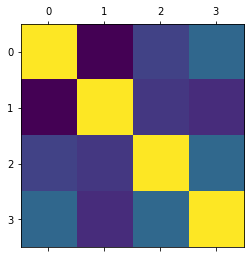

In [56]:
plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

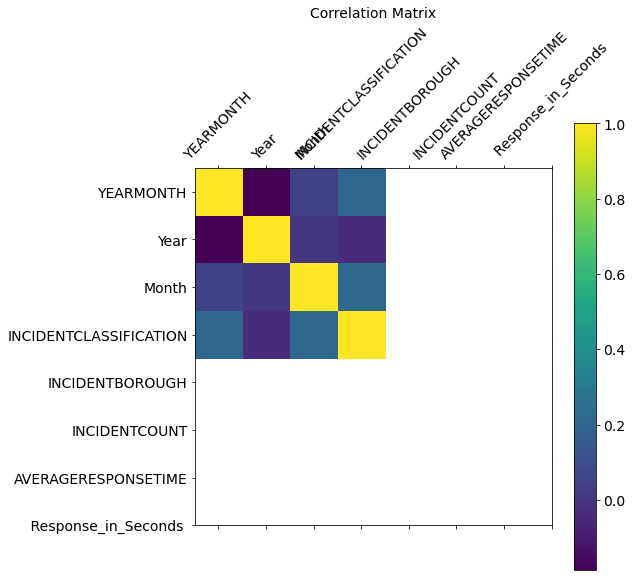

In [57]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [58]:
# Correlation heatmap using seaborn

df.columns

Index(['YEARMONTH', 'Year', 'Month', 'INCIDENTCLASSIFICATION',
       'INCIDENTBOROUGH', 'INCIDENTCOUNT', 'AVERAGERESPONSETIME',
       ' Response_in_Seconds '],
      dtype='object')

In [62]:
sub = df[['Year', 'Month', 'INCIDENTCOUNT']]

In [63]:
sub

,Year,Month,INCIDENTCOUNT
0,2009,7,10709
1,2009,7,8137
2,2009,7,2205
3,2009,7,11505
4,2009,7,8294
...,...,...,...
3355,2017,6,424
3356,2017,6,444
3357,2017,6,90
3358,2017,6,598


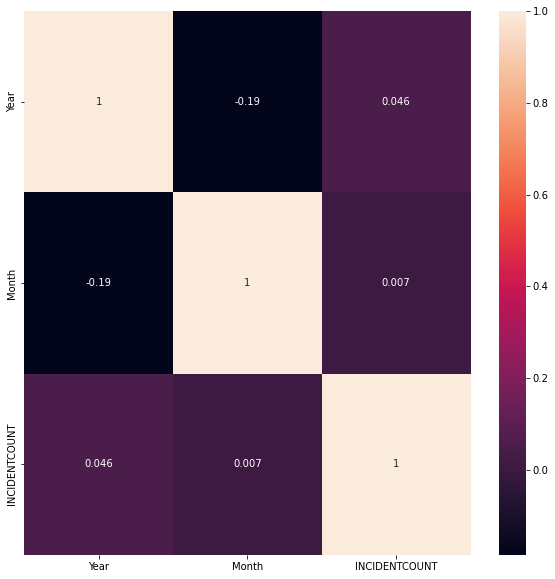

In [64]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

#### Dataset variables all have no to weak relationships. 

# Regression Analysis

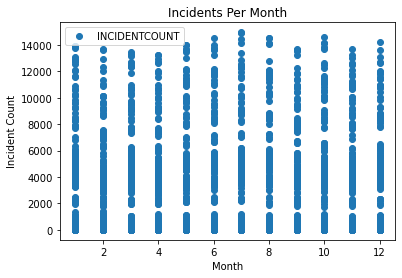

In [17]:
df.plot(x = 'Month', y= 'INCIDENTCOUNT',style='o') 

plt.title('Incidents Per Month')  
plt.xlabel('Month')  
plt.ylabel('Incident Count')  
plt.show()

#### There seems to be a steady variation of scatterplot points within the chart. However, month 7 (July) has more incidents than any other month within the year. The reasoning for this may be due to the Fourth of July and overall summertime activities in New York City. People are generally outside for extended periods, which can cause more accidents. 

In [30]:
X = df['Month'].values.reshape(-1,1)

In [31]:
X

array([[7],
       [7],
       [7],
       ...,
       [6],
       [6],
       [6]])

In [32]:
y = df['INCIDENTCOUNT'].values.reshape(-1,1)

In [33]:
y

array([[10709],
       [ 8137],
       [ 2205],
       ...,
       [   90],
       [  598],
       [  410]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
regression = LinearRegression()

In [36]:
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
y_predicted = regression.predict(X_test)

In [38]:
y_predicted

array([[2471.29990015],
       [2473.08379719],
       [2472.19184867],
       ...,
       [2470.40795163],
       [2474.86769423],
       [2469.96197737]])

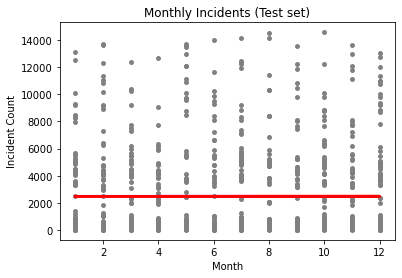

In [39]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Monthly Incidents (Test set)')
plot_test.xlabel('Month')
plot_test.ylabel('Incident Count')
plot_test.show()

In [40]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.44597426]]
Mean squared error:  11455363.16874247
R2 score:  -0.00025409687519162283


In [42]:
y_predicted

array([[2471.29990015],
       [2473.08379719],
       [2472.19184867],
       ...,
       [2470.40795163],
       [2474.86769423],
       [2469.96197737]])

In [43]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,144,2471.299900
1,212,2473.083797
2,52,2472.191849
3,4756,2473.083797
4,364,2470.853926
5,837,2473.083797
6,492,2470.853926
7,3343,2473.975746
8,3255,2473.529771
9,67,2471.745874


In [44]:
# Predicting X_train

y_predicted_train = regression.predict(X_train) 

In [45]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [46]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.44597426]]
Mean squared error:  11623082.675849669
R2 score:  2.0392189814533168e-07


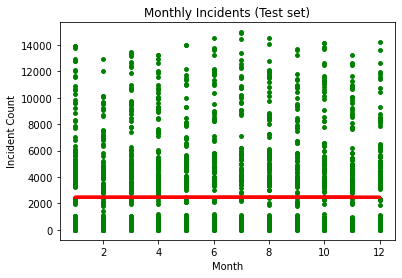

In [68]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Monthly Incidents (Test set)')
plot_test.xlabel('Month')
plot_test.ylabel('Incident Count')
plot_test.show()

# Elbow Technique Analysis

In [97]:
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [98]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [88]:
df_subset = df[['Year', 'Month','INCIDENTCOUNT']]

In [99]:
df_subset.head()

,Year,Month,INCIDENTCOUNT
0,2009,7,10709
1,2009,7,8137
2,2009,7,2205
3,2009,7,11505
4,2009,7,8294


In [100]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_scale = ss.fit_transform(df_subset)

In [101]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

#I decided to use 10 clusters for my elbow chart as I scaled down the dataset, the number of clusters (10) are more appropriate to work with.

In [103]:
score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))]

In [104]:
score

[-38883847132.814285,
 -10504863132.356506,
 -2728082884.5804367,
 -1562233446.3098545,
 -954680340.0807499,
 -725509185.0640181,
 -556020201.964366,
 -452307283.99642646,
 -352161396.87845576]

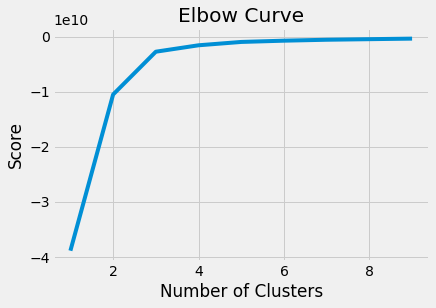

In [105]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The Elbow Curve straightens out from 3 and forwards, which means we used the right amount of clusters.

# K-Means Clustering

In [107]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(df_subset)

In [108]:
km.fit_predict(df_subset)

array([1, 1, 2, ..., 2, 2, 2], dtype=int32)

In [109]:
df['clusters'] = km.fit_predict(df_subset)

In [110]:
df.head()

,YEARMONTH,Year,Month,INCIDENTCLASSIFICATION,INCIDENTBOROUGH,INCIDENTCOUNT,AVERAGERESPONSETIME,Response_in_Seconds,clusters
0,2009/07,2009,7,All Fire/Emergency Incidents,Manhattan,10709,4:32,16320,1
1,2009/07,2009,7,All Fire/Emergency Incidents,Bronx,8137,4:37,16620,1
2,2009/07,2009,7,All Fire/Emergency Incidents,Staten Island,2205,4:45,17100,2
3,2009/07,2009,7,All Fire/Emergency Incidents,Brooklyn,11505,4:01,14460,1
4,2009/07,2009,7,All Fire/Emergency Incidents,Queens,8294,4:43,16980,1


In [111]:
df['clusters'].value_counts()

# 2 seems to have the highest amounr of observation clusters, followed by 0 and 1.

2    2199
0     794
1     367
Name: clusters, dtype: int64

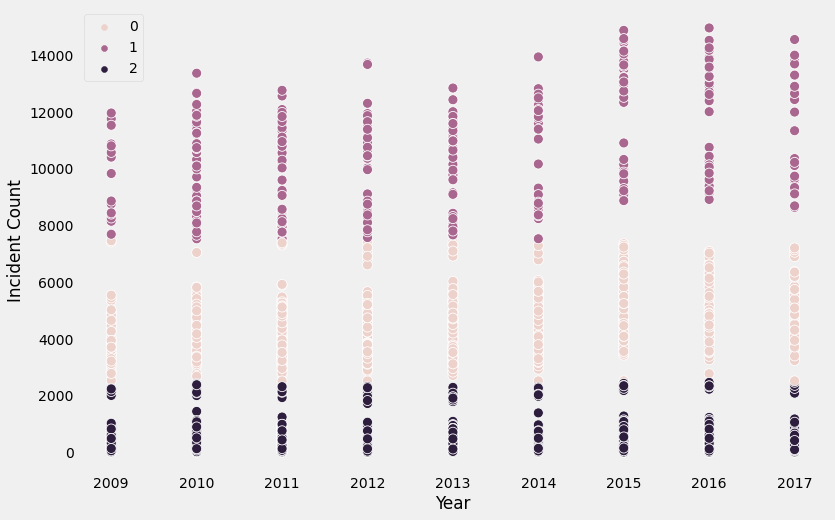

In [115]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['INCIDENTCOUNT'], hue=km.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('Incident Count') 
plt.show()

### 2015 had the highest Incident Count over ten years. 